The dataset contains some tabular columns.

**Goal** of this notebook is to get the **AUCROC** score when we only use tabular features.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [4]:
train = pd.read_csv('data/train.csv')

In [5]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [8]:
features = ['sex', 'age_approx', 'anatom_site_general_challenge',
           'diagnosis']

In [11]:
X = train[features]

In [12]:
y = train.target

In [15]:
for col_name in ['sex', 'anatom_site_general_challenge',
           'diagnosis']:
    le = LabelEncoder()
    X[col_name] = X[col_name].fillna('not_available')
    X[col_name] = le.fit_transform(X[col_name])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
X.age_approx = X.age_approx.fillna(X.age_approx.mean())

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
y.shape, y.dropna().shape

((33126,), (33126,))

In [23]:
scorer = make_scorer(roc_auc_score, needs_proba=True)

In [25]:
model = RandomForestClassifier()

In [55]:
arr = cross_val_score(model, X.iloc[:,:-1],y,cv=5,scoring=scorer)

In [56]:
arr

array([0.64638705, 0.67553613, 0.63093944, 0.6189312 , 0.69224597])

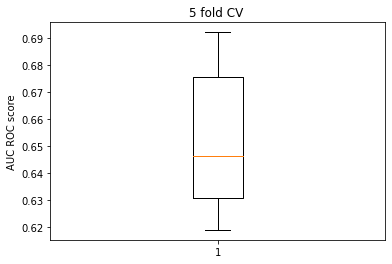

In [60]:
plt.boxplot(x=arr)
plt.ylabel('AUC ROC score')
plt.title('5 fold CV ')
plt.savefig('images/tab-features-5-fold-cv.jpg')

In [54]:
print(train.head().to_markdown())

|    | image_name   | patient_id   | sex    |   age_approx | anatom_site_general_challenge   | diagnosis   | benign_malignant   |   target |
|---:|:-------------|:-------------|:-------|-------------:|:--------------------------------|:------------|:-------------------|---------:|
|  0 | ISIC_2637011 | IP_7279968   | male   |           45 | head/neck                       | unknown     | benign             |        0 |
|  1 | ISIC_0015719 | IP_3075186   | female |           45 | upper extremity                 | unknown     | benign             |        0 |
|  2 | ISIC_0052212 | IP_2842074   | female |           50 | lower extremity                 | nevus       | benign             |        0 |
|  3 | ISIC_0068279 | IP_6890425   | female |           45 | head/neck                       | unknown     | benign             |        0 |
|  4 | ISIC_0074268 | IP_8723313   | female |           55 | upper extremity                 | unknown     | benign             |        0 |
